<a href="https://colab.research.google.com/github/mgfernan/gsl_uab/blob/main/p3_GNSS_IMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOCALIZATION SYSTEMS – Positioning with Inertial Measurement Units (Practice 3)

In this practice, we will focus on the fundamentals of positioning based on Inertial Measurement Units (IMU). We will compute the position by integrating the acceleration given by the IMU sensor.


In [ ]:
# Add required libraries
import pandas as pd
import matplotlib.pyplot as plt

## Short tutorial on `pandas`

Pandas is a powerful Python library for data manipulation and analysis. It provides data structures and functions needed to work with structured data seamlessly. In this tutorial, we'll cover some fundamental aspects of Pandas.

### Creating a DataFrame

A DataFrame is a two-dimensional labeled data structure with columns that can be of different types. You can create a DataFrame using various methods, such as from dictionaries, lists, or reading data from files.

In [ ]:
# Create a DataFrame from a dictionary
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22


### Reading Data from a CSV File

Pandas makes it easy to read data from various file formats, such as CSV, Excel, SQL databases, etc. Here's how you can read data from a CSV file:

In [ ]:
# Read data from a CSV file
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   28
4      Eve   24


### Basic DataFrame Operations

Pandas offers numerous functions to manipulate and analyze data:

In [ ]:
# Selecting a column
ages = df['Age']
print(ages)

In [ ]:
# Filtering rows
young_people = df[df['Age'] < 30]
print(young_people)

      Name  Age Gender
0    Alice   25      F
2  Charlie   22      M
3    David   28      M
4      Eve   24      F


In [ ]:
# Adding a new column
df['Gender'] = ['F', 'M', 'M', 'M', 'F']
print(df)

      Name  Age Gender
0    Alice   25      F
1      Bob   30      M
2  Charlie   22      M
3    David   28      M
4      Eve   24      F


In [ ]:
# Grouping and aggregation
grouped = df.groupby('Gender').mean()
print(grouped)

              Age
Gender           
F       24.500000
M       26.666667


In [ ]:
# Sorting
sorted_df = df.sort_values(by='Age', ascending=False)
print(sorted_df)

      Name  Age Gender
1      Bob   30      M
3    David   28      M
0    Alice   25      F
4      Eve   24      F
2  Charlie   22      M


### Data Visualization

Albeit Pandas also provides basic plotting capabilities using the `plot()` function, you can also use `matplotlib` for this
purpose, which will give you more flexibility

<BarContainer object of 5 artists>

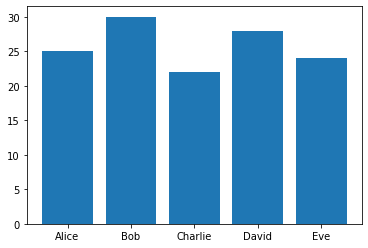

In [ ]:
# Plotting a bar chart
plt.bar(df['Name'], df['Age'])

## Practice exercises

**Exercise 1: data load**

**Using pandas, read the file `trajectory.csv` that contains the position and acceleration into a `DataFrame` structure**

**Tip**: Use the Pandas `read_csv` method

Answer the following questions:

1. What are the magnitudes (columns) contained in the `DataFrame`? Describe them briefly in one short sentence.
1. How many epochs does the file contain?
1. What is the sampling rate of the data file?

**Exercise 2: plotting**

**Use matplotlib to plot the horizontal (i.e. North vs East) trajectory**

**Tip:** Use the `plt.plot` method

Answer the following questions:

1. What do you see in the plot?
1. How long is the trajectory in the East component, approximately? And in the North component?



**Exercise 3: Availability and Continuity**

Answer the following questions:

1. Is the trajectory **available** all the time? If not, what are the typical causes for lack of availability in a positioning system based on GNSS? How can it be solved?
1. Compute the **availability** (in percentage) of the position? Tip: you will need to check the number of positions (either East or North) that are valid (i.e. not NaN) using the pandas method `isna()`.
1. Plot the time difference for the valid points. Can this be related to the trajectory plot? How many data gaps do you have in the trajectory? which sizes approximately? Tip: compute the epoch difference for the valid points
1. For the parts of the trajectory that do not have gaps, which is the **continuity** of the samples?


**Exercise 4: Trajectory reconstruction**

In this exercise we will use the acceleration to reconstruct the position at the missing parts, just in the same way as the IMU help GNSS in parts of the route where GNSS is not available.

For this exercise you will need the following method

In [ ]:
def integrate_trajectory(dts, positions, accelerations):

    out = []
    for dt, pos, accel in zip(dts, positions, accelerations):

        if math.isnan(pos):
            prev_velocity = (out[-1] - out[-2]) / dt
            velocity = prev_velocity + accel * dt
            position = position + velocity * dt

        else:
            position = pos

        out.append(position)

    return out


Answer the following questions:

1. Have a look at the method `integrate_trajectory` and briefly describe what it does
1. Plot the acceleration in one of the components. Do we have gaps in this magnitude? Which is the **availability** of the acceleration?
1. Compute the velocity at each point and plot it.
1. Reconstruct (integrate) the trajectory with gaps to achieve 100% availability. Tip: use the `integrate_trajectory` method

**Exercise 4: Trajectory reconstruction with biased accelerations**

One of the main problems of IMU are the biases of the sensors, that need to be corrected during integration, otherwise
the trajectory will be wrong as the errors accumulate in time.

To check this effect, create two new accelration time series with a constant bias of $0.1 m/s^2$ for the East component and $0.2 m/s^2$ for the North component. Repeat the steps 2 and 4 of Exercise 3 and describe what do you see in the resulting plot (and the reason why)